<a href="https://colab.research.google.com/github/dlcodnjs2/2023/blob/main/Gaussian_Mixture_Model_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

targetUrl = "https://raw.githubusercontent.com/dlcodnjs2/2023/main/insurance.csv"

df = pd.read_csv(targetUrl, sep=',')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df2 = df[['age', 'charges']]

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1338 non-null   int64  
 1   charges  1338 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 21.0 KB


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

In [6]:
import numpy as np
from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 10)
gmm = [GaussianMixture(n, covariance_type='full', random_state=42).fit(df2_scaled) for n in n_components]

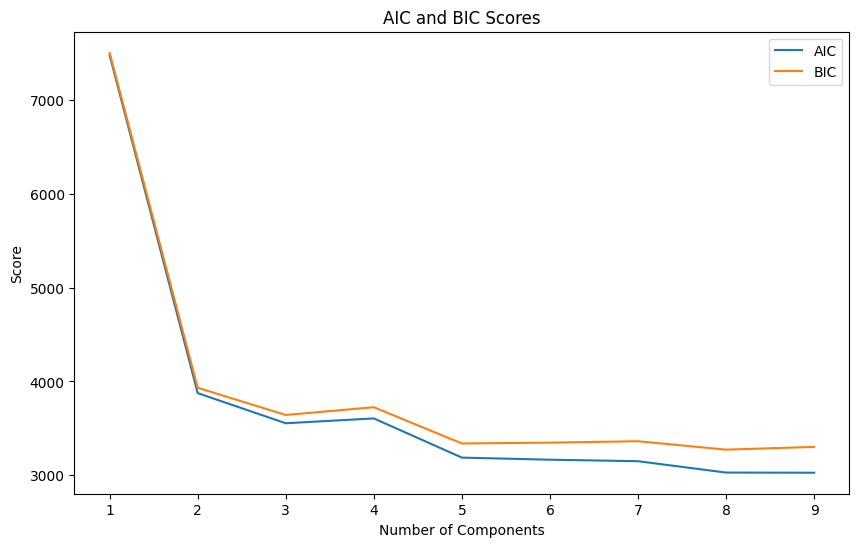

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(n_components, [m.aic(df2_scaled) for m in gmm], label='AIC')
plt.plot(n_components, [m.bic(df2_scaled) for m in gmm], label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('AIC and BIC Scores')
plt.show()

In [8]:
best_idx = np.argmin([m.bic(df2_scaled) for m in gmm])
best_model = gmm[best_idx]
n_clusters = best_idx + 1

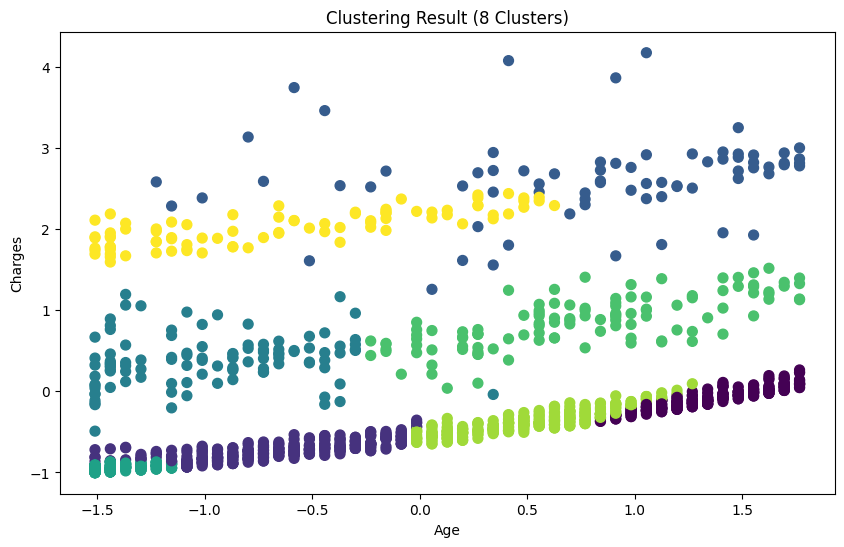

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df2_scaled[:, 0], df2_scaled[:, 1], c=best_model.predict(df2_scaled), cmap='viridis', s=50)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Clustering Result ({} Clusters)'.format(n_clusters))
plt.show()

In [10]:
samples = best_model.sample(n_samples=5)
samples = scaler.inverse_transform(samples[0])

In [11]:
threshold = np.percentile(best_model.score_samples(df2_scaled), 2)
outliers = df2_scaled[best_model.score_samples(df2_scaled) < threshold]

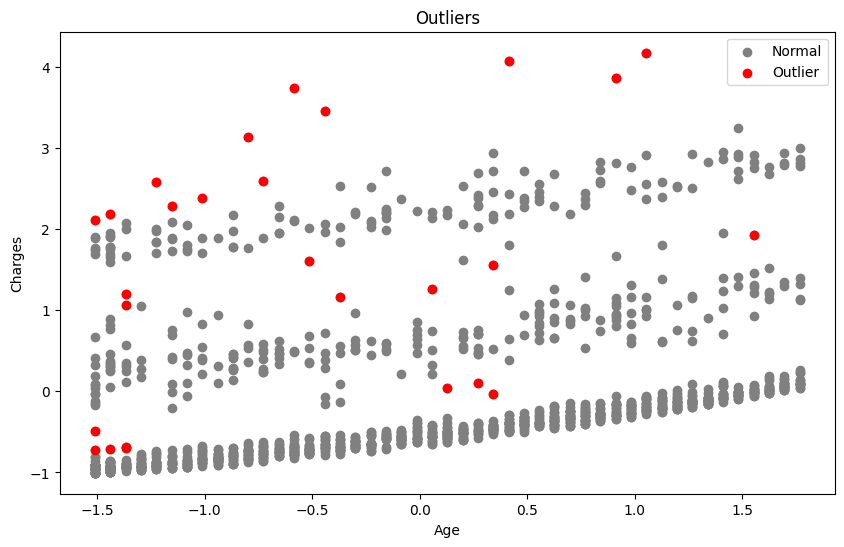

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df2_scaled[:, 0], df2_scaled[:, 1], c='gray', label='Normal')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', label='Outlier')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Outliers')
plt.legend()
plt.show()